# Adaptive linear neurons and the convergence of learning

In [1]:
from IPython.display import Image

The Adaline algorithm is particularly interesting because it illustrates the key concept of defining and minimizing cost functions, which will lay the groundwork for understanding more advanced machine learning algorithms for classfication, such as logistic regression and support vector machines, as well as regression models.  

The key difference between the Adaline rule and Rosenblatt's perceptron is that the weights are updated based on a linear activation function rather than a unit step function like in the perceptron. In Adaline, this linear activation function $\phi(z)$ is simply the identity function of the net input so that $\phi(w^Tx)=w^Tx$.

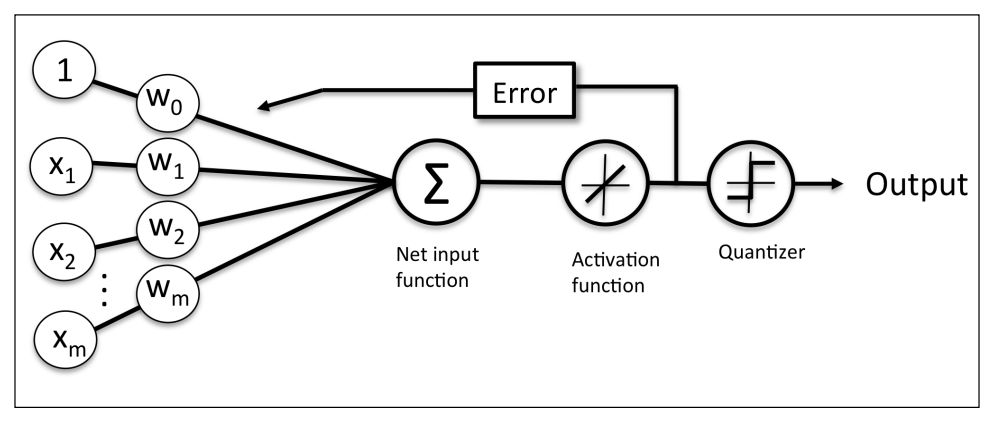

In [4]:
Image(filename='./images/02_01.png', width=500)

## Minimizing cost functions with gradient descent

* Define an *objective function*, and to minimize it
$$J(w)=\frac{1}{2}\sum_i(y^{(i)}-\phi(z^{(i)}))^2$$  
1) The main advantage of this continuous linear activation function is 
in contrast to the unit step function - that the cost function becomes differentiable. 
2) Another nice property of this cost function is that it is convex.

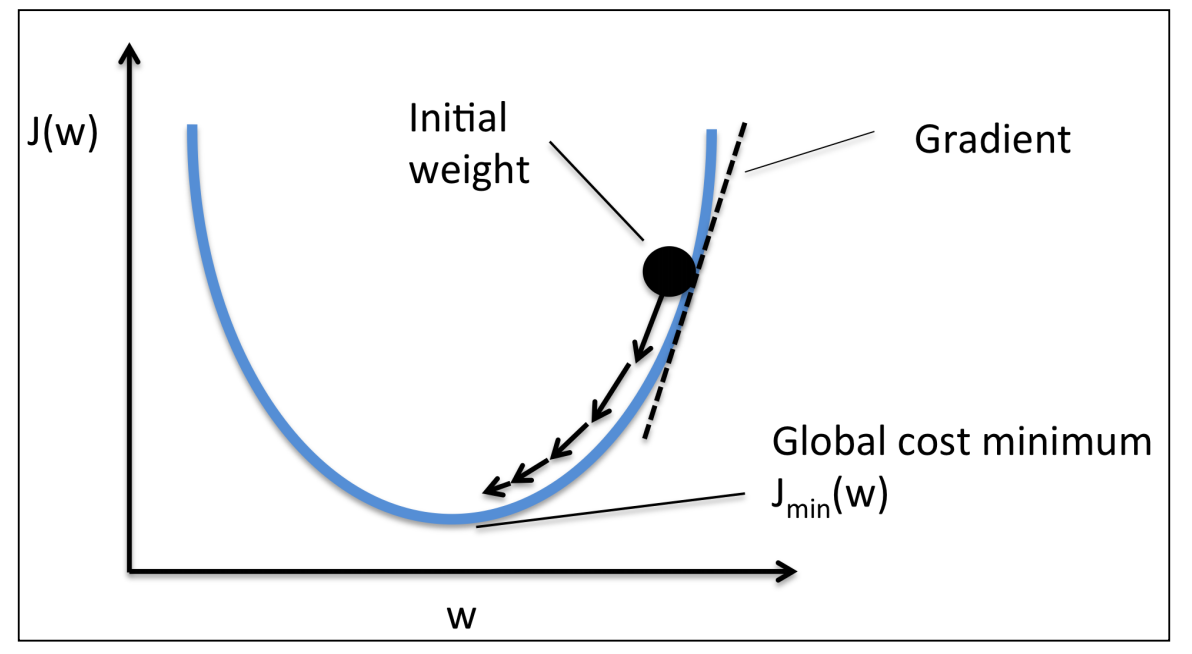

In [5]:
Image(filename='./images/02_02.png', width=500)

Using gradient descent, we can now update the weights by taking a step away from the gradient $\nabla J(w)$ of our cost function $J(w)$:

$$\mathbf{w}:=\mathbf{w}+\Delta \mathbf{w}$$

Here, the weight change $\Delta w$ is defined as the negative gradient multiplied by the learning rate $\eta$:
$$\Delta \mathbf{w} = -\eta \nabla J(\mathbf{w})$$

So we need to compute the partial derivative of the cost function with respect to each weight $w_j, \frac{\partial J}{\partial w_j}=-\sum_i(y^{(i)}-\phi(z^{i}))x_j^{(i)}$. Since we update all weights simultaneously, our Adaline learning rule becomes $\mathbf{w}:= \mathbf{w}+\Delta \mathbf{w}$.

## Implementing an Adaptive Linear Neuron in Python

In [13]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.
    
    Parameters
    -----------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset. (?)
    
    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifictions in every epoch.
    
    """
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        """Fit training data.
    
        Parameters
        -----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors,
            where n_samples is the number of samples and 
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1]) # this can be [0] initially, different than Perceptron.
        self.cost_ = []
    
        for _ in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression, we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """Compute net input"""
        return self.net_input(X)
    
    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)